In [50]:
import tensorflow as tf
from tensorflow.keras import models,layers

import numpy as np

In [51]:
import matplotlib.pyplot as plt

In [52]:
IMAGE_SIZE=300
BATCH_SIZE=32
CHANNELS =3
EPOHS=50

In [53]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "Dataset",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 550 files belonging to 4 classes.


In [54]:
class_names = dataset.class_names
class_names

['Alternaria_Leaf_Spot', 'Fusarium_Wilt', 'Healthy_Leaf', 'Yellow_Mosaic']

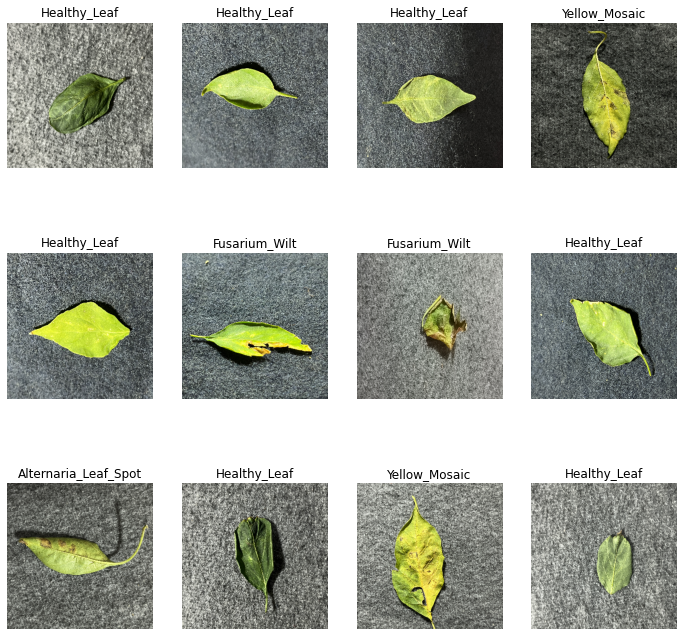

In [55]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
#     print(image_batch[0].shape)
    

In [56]:
len(dataset)


18

In [57]:
train_size=0.8
len(dataset)*train_size

14.4

In [58]:
train_ds = dataset.take(8)
len(train_ds)

8

In [59]:
test_ds = dataset.skip(8)
len(test_ds)

10

In [60]:
val_size = 0.1
len(dataset)*val_size

1.8

In [61]:
val_ds= test_ds.take(1)
len(val_ds)

1

In [62]:
 def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
        ds_size= len(ds)
        
        if shuffle:
            ds= ds.shuffle(shuffle_size,seed =12)
        
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)
        
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds,val_ds,test_ds

In [63]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [64]:
len(train_ds)

14

In [65]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [66]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [67]:
#dataagumentation
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])


In [68]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
   
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
    
])
model.build(input_shape=input_shape)

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (32, 300, 300, 3)         0         
                                                                 
 sequential_9 (Sequential)   (32, 300, 300, 3)         0         
                                                                 
 conv2d_34 (Conv2D)          (32, 298, 298, 32)        896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (32, 149, 149, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (32, 147, 147, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (32, 73, 73, 32)         0         
 g2D)                                                

In [70]:
model.compile(
 optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [73]:
history =model.fit(
train_ds,
epochs=50,
batch_size=BATCH_SIZE,
verbose=1,
    validation_data=val_ds
)

Epoch 1/50
14/14 [==============================] - 55s 4s/step - loss: 0.6171 - accuracy: 0.7630 - val_loss: 0.7415 - val_accuracy: 0.7812
Epoch 2/50
14/14 [==============================] - 54s 4s/step - loss: 0.6043 - accuracy: 0.7583 - val_loss: 0.6779 - val_accuracy: 0.7812
Epoch 3/50
14/14 [==============================] - 55s 4s/step - loss: 0.5909 - accuracy: 0.7654 - val_loss: 0.8921 - val_accuracy: 0.6562
Epoch 4/50
14/14 [==============================] - 54s 4s/step - loss: 0.5247 - accuracy: 0.8175 - val_loss: 0.7744 - val_accuracy: 0.8125
Epoch 5/50
14/14 [==============================] - 54s 4s/step - loss: 0.5242 - accuracy: 0.8033 - val_loss: 0.7622 - val_accuracy: 0.7188
Epoch 6/50
14/14 [==============================] - 54s 4s/step - loss: 0.5354 - accuracy: 0.7891 - val_loss: 0.8854 - val_accuracy: 0.7188
Epoch 7/50
14/14 [==============================] - 54s 4s/step - loss: 0.5299 - accuracy: 0.7867 - val_loss: 0.6951 - val_accuracy: 0.7812
Epoch 8/50
14/14 [==

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

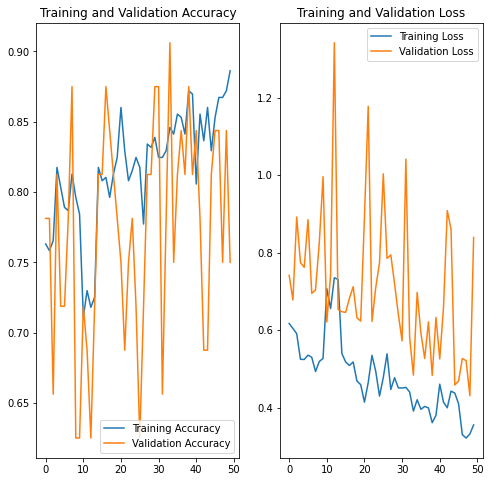

In [82]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Yellow_Mosaic
predicted class name  Yellow_Mosaic


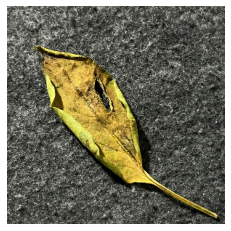

In [83]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted class name " ,class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")
    
#      plt.imshow(image_batch[i].numpy().astype("uint8"))
#      plt.title(class_names[label_batch[i]])
#      plt.axis("off")
 
       

In [30]:
2*3

6

In [84]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

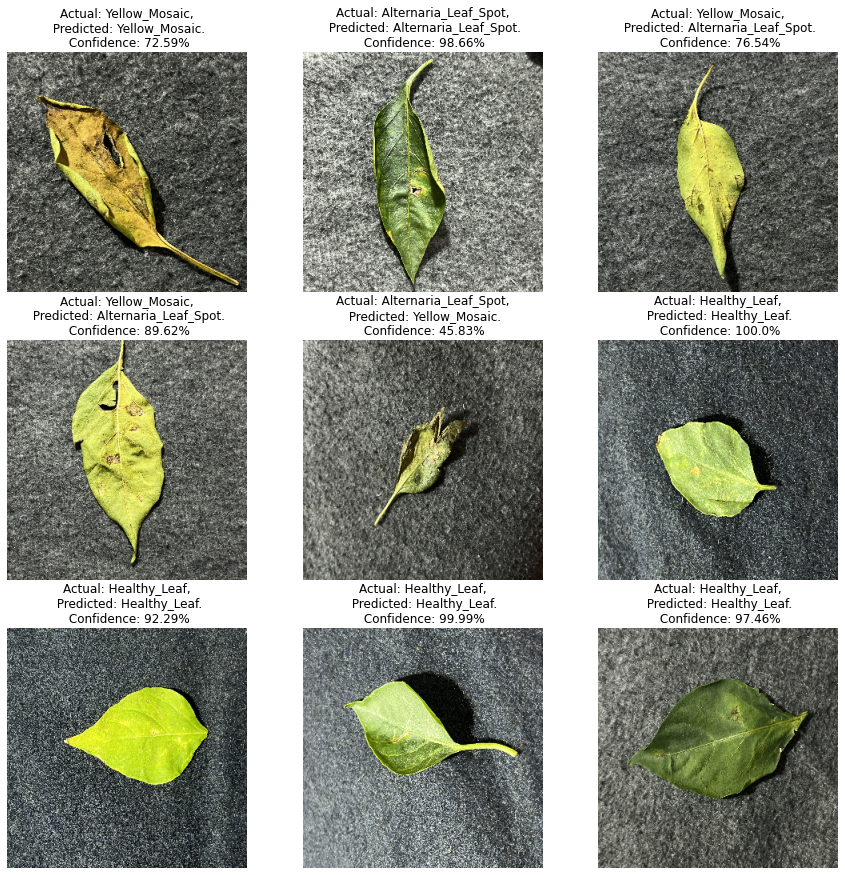

In [94]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

KeyError: "Failed to add concrete function 'b'__inference_sequential_10_layer_call_fn_73380'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [96]:
model.save("../chili.h5")